>
> # MaaSSim tutorial

 ### quickstart

In [12]:
import os, sys # add MaaSSim to path (not needed if MaaSSim is already in path)
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

prepare

In [13]:
from MaaSSim.utils import get_config, load_G, prep_supply_and_demand  # simulator
from MaaSSim.data_structures import structures as inData
from MaaSSim.simulators import simulate

In [14]:
params = get_config('../../data/config/default.json')  # load configuration

In [15]:
params.nP = 2  # parameterize supply 
params.nV = 1  # and demand

In [16]:
inData = load_G(inData, params)  # load network graph 

In [17]:
inData = prep_supply_and_demand(inData, params)  # generate supply and demand

simulate

In [18]:
sim = simulate(params = params, inData = inData) # simulate

06-10-20 11:16:02-WARNING-Setting up 1h simulation at 2020-10-06 10:56:46 for 1 vehicles and 2 passengers in Nootdorp, Netherlands
06-10-20 11:16:02-INFO--------------------	Starting simulation	-------------------
06-10-20 11:16:02-INFO-pax    0  got to dest at                           2020-10-06 11:02:05
06-10-20 11:16:02-INFO-pax    1  got to dest at                           2020-10-06 11:28:21
06-10-20 11:16:02-INFO-veh    1  quitted shift                            2020-10-06 13:56:45
06-10-20 11:16:02-INFO--------------------	Simulation over		-------------------
06-10-20 11:16:02-INFO-queue of requests 0
06-10-20 11:16:02-WARNING-simulation time 0.1 s
06-10-20 11:16:02-WARNING-assertion tests for simulation results - passed


### walkthrough

demand structure

In [19]:
inData.requests.head(2)

,pax_id,origin,destination,treq,tdep,ttrav,tarr,tdrop,shareable,schedule_id,dist,platform,ride_id,position,sim_schedule
0,0,1432312427,44991812,2020-10-06 10:56:46,NaN,00:03:09,2020-10-06 10:59:55,NaN,False,NaN,1893,0,0,0,node time req_id od 0 ...
1,1,981159463,4290089187,2020-10-06 11:22:58,NaN,00:03:11,2020-10-06 11:26:09,NaN,False,NaN,1910,0,1,0,node time req_id od 0 ...


In [20]:
inData.vehicles.head(2)

,pos,event,shift_start,shift_end,platform,expected_income
veh,,,,,,
1,4.290089e+09,driverEvent.ENDS_SHIFT,0,86400,0,NaN


In [21]:
inData.passengers.head(2)

,pos,event,platforms
0,1432312427,NaN,[0]
1,981159463,NaN,[0]


#### visualize the demand

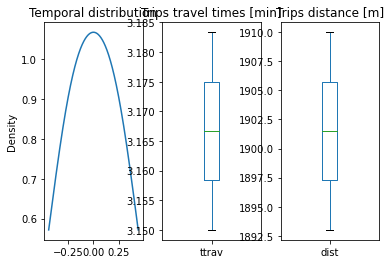

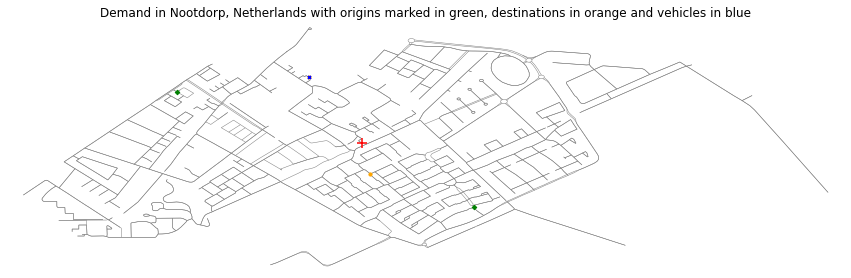

In [22]:
#import matplotlib.pyplot as plt
#inData.requests['dist'] = [inData.skim[request.origin]
#                           [request.destination] for _, request in inData.requests.iterrows()]     
from MaaSSim.visualizations import plot_demand
plot_demand(inData, vehicles = True, s = 10, params = params)

#### results (raw)

In [12]:
list(sim.runs.keys()) #consecutive runs

[0]

In [13]:
list(sim.runs[0].keys()) # single run results

['trips', 'outcomes', 'rides', 'queues']

passengers raw results

In [14]:
sim.runs[0].trips.head(10) #trip segment reports

,pax,pos,t,event,veh_id
0,0,45028719,0,STARTS_DAY,NaN
1,0,45028719,0,REQUESTS_RIDE,NaN
2,0,45028719,0,RECEIVES_OFFER,NaN
3,0,45028719,15,ACCEPTS_OFFER,NaN
4,0,45028719,35,ARRIVES_AT_PICKUP,1.0
5,0,45028719,467,MEETS_DRIVER_AT_PICKUP,1.0
6,0,45028719,497,DEPARTS_FROM_PICKUP,1.0
7,0,1658828038,733,ARRIVES_AT_DROPOFF,1.0
8,0,1658828038,743,SETS_OFF_FOR_DEST,NaN
9,0,1658828038,743,ARRIVES_AT_DEST,NaN


vehicles raw results

In [15]:
df = sim.runs[0].rides
df[df.veh == 1]

,veh,pos,t,event,paxes
0,1,4.938564e+08,0,STARTS_DAY,[]
1,1,4.938564e+08,0,OPENS_APP,[]
2,1,4.938564e+08,0,RECEIVES_REQUEST,[]
3,1,4.938564e+08,15,ACCEPTS_REQUEST,[]
4,1,4.938564e+08,35,IS_ACCEPTED_BY_TRAVELLER,[]
5,1,4.502872e+07,467,ARRIVES_AT_PICKUP,[]
6,1,4.502872e+07,467,MEETS_TRAVELLER_AT_PICKUP,[]
7,1,4.502872e+07,497,DEPARTS_FROM_PICKUP,[0]
8,1,1.658828e+09,733,ARRIVES_AT_DROPOFF,[0]
9,1,1.658828e+09,1757,RECEIVES_REQUEST,[]


### visualization

In [16]:
df = sim.runs[0].trips
df = df[df.pax == 1]
df

,pax,pos,t,event,veh_id
0,1,45028719,0,STARTS_DAY,NaN
1,1,45028719,1757,REQUESTS_RIDE,NaN
2,1,45028719,1757,RECEIVES_OFFER,NaN
3,1,45028719,1772,ACCEPTS_OFFER,NaN
4,1,45028719,1792,ARRIVES_AT_PICKUP,1.0
5,1,45028719,2007,MEETS_DRIVER_AT_PICKUP,1.0
6,1,45028719,2037,DEPARTS_FROM_PICKUP,1.0
7,1,45023464,2196,ARRIVES_AT_DROPOFF,1.0
8,1,45023464,2206,SETS_OFF_FOR_DEST,NaN
9,1,45023464,2206,ARRIVES_AT_DEST,NaN


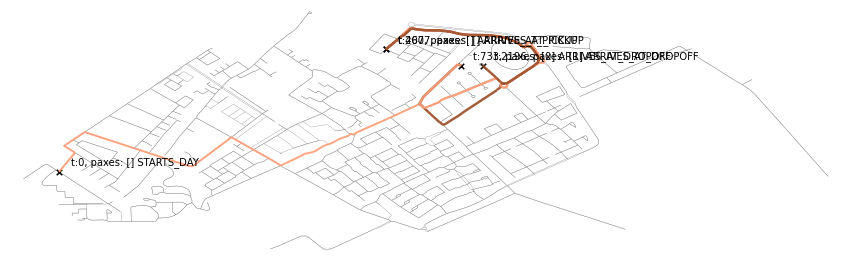

In [17]:
from MaaSSim.visualizations import plot_veh
df = sim.runs[0].rides
plot_veh(inData.G, df[df.veh ==1])

### results processed

In [18]:
sim.output() # call to generate reports

In [19]:
list(sim.res[0].keys())

['pax_exp', 'pax_kpi', 'veh_exp', 'veh_kpi']

In [20]:
sim.res[0].pax_kpi

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,RECEIVES_OFFER,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE,nP
sum,30.0,395.000000,40.0,60.0,647.000000,1757.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
mean,15.0,197.500000,20.0,30.0,323.500000,1757.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
std,0.0,54.447222,0.0,0.0,153.442172,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [21]:
sim.res[0].veh_kpi.T.head(1)

,sum,mean,std
nRIDES,2.0,2.0,NaN


In [22]:
sim.res[0].veh_exp

,nRIDES,nREJECTED,OUT,STARTS_DAY,OPENS_APP,RECEIVES_REQUEST,ACCEPTS_REQUEST,REJECTS_REQUEST,IS_ACCEPTED_BY_TRAVELLER,IS_REJECTED_BY_TRAVELLER,ARRIVES_AT_PICKUP,MEETS_TRAVELLER_AT_PICKUP,DEPARTS_FROM_PICKUP,ARRIVES_AT_DROPOFF,CONTINUES_SHIFT,STARTS_REPOSITIONING,REPOSITIONED,DECIDES_NOT_TO_DRIVE,ENDS_SHIFT
veh,,,,,,,,,,,,,,,,,,,
1,2,0.0,False,0,0,1024.0,30.0,0,40.0,0,647.0,0,60.0,395.0,0,0,0,0,8603.0


In [23]:
sim.res[0].pax_exp.tail()

,ACCEPTS_OFFER,ARRIVES_AT_DROPOFF,ARRIVES_AT_PICKUP,DEPARTS_FROM_PICKUP,MEETS_DRIVER_AT_PICKUP,REQUESTS_RIDE,SETS_OFF_FOR_DEST,STARTS_DAY,RECEIVES_OFFER,IS_REJECTED_BY_VEHICLE,REJECTS_OFFER,ARRIVES_AT_DEST,PREFERS_OTHER_SERVICE,LOSES_PATIENCE
pax,,,,,,,,,,,,,,
0,15.0,236.0,20.0,30.0,432.0,NaN,10.0,0,0,0,0,0,0,0
1,15.0,159.0,20.0,30.0,215.0,1757.0,10.0,0,0,0,0,0,0,0


-----